In [14]:
%load_ext autoreload
%autoreload 2

# --- imports --

import importlib
import radial_functions as radial

# Reload functions to ensure we have the latest version
importlib.reload(radial)



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2 A system with radial symmetry

We consider the radial (amplitude) equation
$$
\dot r=\mu r+r^3-r^5 \;=\; r(\mu+r^2-r^4),
$$
with $\mu\in\mathbb{R}$ the parameter of the system.

Viewed as a 1D dynamical system in $r\ge 0$, the goal is to find the equilibria $r_{eq}$, classify their stability from the sign of $f'(r_{eq})$, and determine for which values of $\mu$ the number and stability of equilibria change, i.e. identify the bifurcations.

To translate this to a 2D radially symmetric setting, we embed the dynamics in polar coordinates $(r,\theta)$ and prescribe a nontrivial angular motion (e.g. $\dot\theta=\omega\neq 0$). Then $r(t)$ controls the distance to the origin while $\theta(t)$ rotates the trajectory. In this interpretation, $r=0$ corresponds to the fixed point at the origin, and any nonzero constant radius $r_{eq}$ corresponds to a circular periodic orbit (limit cycle) of radius $r_{eq}$, whose stability is inherited directly from the 1D stability of $r_{eq}$. We will visualize the different $\mu$-regimes using a phase line for $r$ and phase portraits in $(x,y)$ with $r=\sqrt{x^2+y^2}$ and an initial angular velocity $\dot\theta\neq 0$.

### 2.1 1D Radius Dynamics: Equilibria and Bifurcation Structure

### 2.2 2D Interpretation: Invariant Circles, Phase Portraits, and the Role of $\dot\theta\neq 0$

#### Theory: From 1D to 2D

In the 1D radial equation $\dot{r} = \mu r + r^3 - r^5$, we analyze equilibria in $r \geq 0$.

To embed this in a 2D system, we use polar coordinates $(r, \theta)$ with:
- **Radial dynamics**: $\dot{r} = \mu r + r^3 - r^5$ (unchanged)
- **Angular dynamics**: $\dot{\theta} = \omega$ (constant rotation, e.g., $\omega = 1$)

**Converting to Cartesian coordinates** $(x, y)$ where $r = \sqrt{x^2 + y^2}$:

$$
\begin{align}
\frac{dx}{dt} &= \frac{f(r, \mu)}{r} \cdot x - \omega y \\
\frac{dy}{dt} &= \frac{f(r, \mu)}{r} \cdot y + \omega x
\end{align}
$$

where $f(r, \mu) = \mu r + r^3 - r^5$.

**Physical interpretation**:
- $r = 0$ → fixed point at the origin (no rotation, just equilibrium)
- $r = r_{eq} > 0$ → **limit cycle** (circular periodic orbit) of radius $r_{eq}$
- Stability of the limit cycle inherits directly from the 1D stability of $r_{eq}$:
  - If $f'(r_{eq}) < 0$ → **stable limit cycle** (trajectories spiral towards the circle)
  - If $f'(r_{eq}) > 0$ → **unstable limit cycle** (trajectories spiral away from the circle)

In [15]:
# Analyze equilibria for a test case
mu_test = 0.5

print(f"For μ = {mu_test}:")
print(f"Equilibria: {radial.find_equilibria(mu_test)}")
print()
radial.analyze_equilibria(mu_test, verbose=True)

For μ = 0.5:
Equilibria: [0.0, np.float64(1.1687708944803676)]

r_eq = 0.0000 (origin): unstable (f'(r_eq) = 0.5000)
r_eq = 1.1688: stable (f'(r_eq) = -4.7321)


[{'r': 0.0, 'stability': 'unstable', 'derivative': 0.5},
 {'r': np.float64(1.1687708944803676),
  'stability': 'stable',
  'derivative': np.float64(-4.732050807568877)}]

#### Visualization: Phase Portraits for Different μ Regimes

We'll now visualize the 2D phase portraits for three critical regimes:
1. **μ < -1/4**: Only the origin exists (globally stable)
2. **-1/4 < μ < 0**: Origin stable, two limit cycles emerge
3. **μ > 0**: Origin unstable, stable outer limit cycle exists

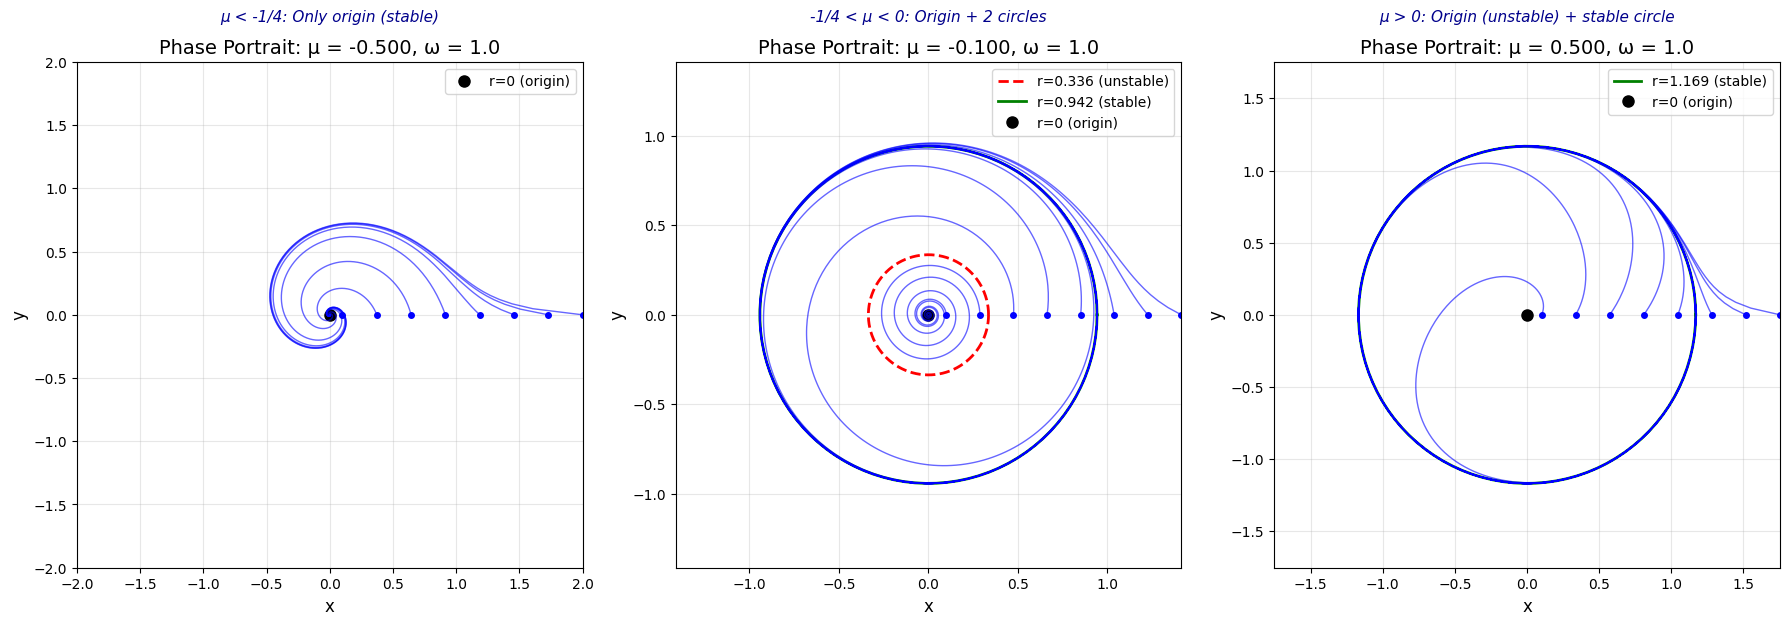

In [16]:
# Plot phase portraits for the three regimes
mu_values = [-0.5, -0.1, 0.5]
regime_names = [
    "μ < -1/4: Only origin (stable)",
    "-1/4 < μ < 0: Origin + 2 circles",
    "μ > 0: Origin (unstable) + stable circle"
]

fig, axes = radial.plot_multiple_portraits(mu_values, omega=1.0, figsize=(18, 6))

for ax, name in zip(axes, regime_names):
    ax.text(0.5, 1.08, name, transform=ax.transAxes, 
            ha='center', fontsize=11, style='italic', color='darkblue')

plt.show()

#### Time Evolution of Radius

Let's visualize how $r(t)$ evolves over time for different initial conditions, showing how trajectories approach stable limit cycles or diverge from unstable ones.

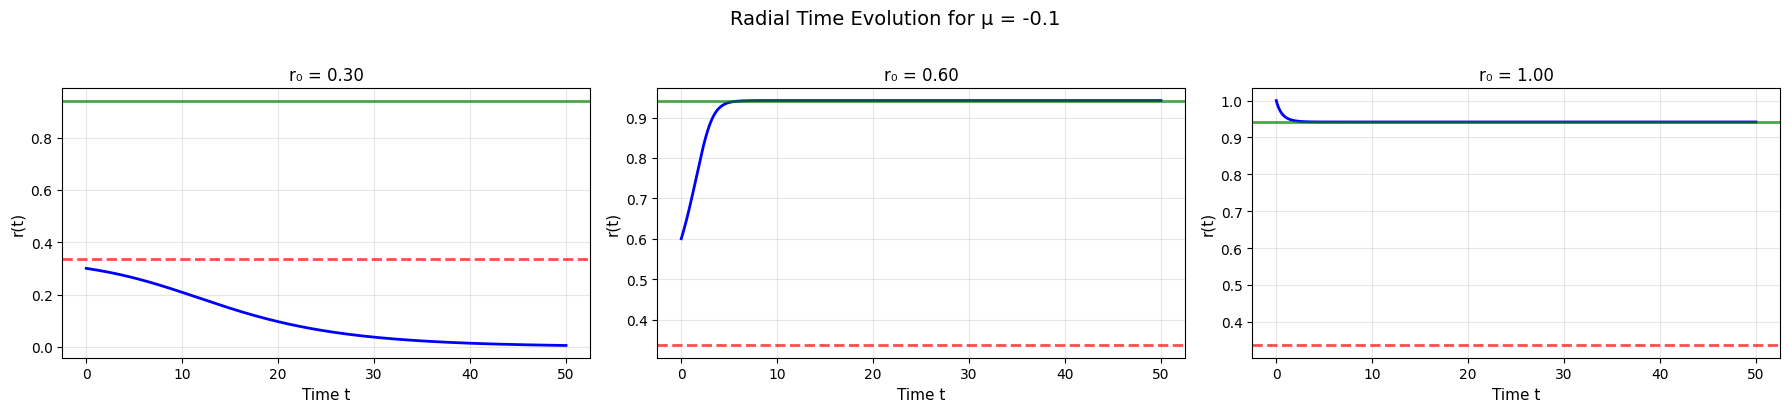

In [17]:
# Time evolution for different initial conditions
mu = -0.1
initial_radii = [0.3, 0.6, 1.0]

fig, axes = radial.plot_time_evolution_comparison(mu, initial_radii, omega=1.0, t_max=50)
plt.show()

#### Key Observations

**The role of $\omega \neq 0$:**
- When $\omega = 0$ (no rotation), trajectories would simply move radially inward or outward along straight lines
- With $\omega \neq 0$, trajectories spiral around the origin while simultaneously moving radially
- This creates **circular limit cycles** at the equilibrium radii $r_{eq}$

**Stability behavior:**
- Trajectories starting inside a stable limit cycle spiral **outward** towards it
- Trajectories starting outside a stable limit cycle spiral **inward** towards it  
- Trajectories near an unstable limit cycle spiral **away** from it (either inward or outward depending on initial position)

**The separatrix:**
- In regimes with multiple limit cycles (e.g., $-1/4 < \mu < 0$), the unstable limit cycle acts as a **separatrix**
- It divides the phase space into basins of attraction for different stable equilibria
- Initial conditions inside the unstable circle → spiral to inner stable circle (or origin)
- Initial conditions outside the unstable circle → spiral to outer stable circle


### 2.3 Global Narrative: Stability Regions, Separatrices, and What the System Does in Each Regime

#### Overview of System Behavior

The radial equation $\dot{r} = \mu r + r^3 - r^5 = r(\mu + r^2 - r^4)$ exhibits rich bifurcation behavior as $\mu$ varies. We identify three distinct regimes separated by two critical bifurcation points.

#### Bifurcation Analysis

To find where equilibria appear or disappear, we solve $\mu + r^2 - r^4 = 0$ for $r > 0$.

Let $u = r^2$, then: $u^2 - u - \mu = 0$

Solutions: $u = \frac{1 \pm \sqrt{1 + 4\mu}}{2}$

For real equilibria, we need $1 + 4\mu \geq 0$, i.e., $\mu \geq -\frac{1}{4}$.

**Critical bifurcation points:**

1. **$\mu = -\frac{1}{4}$**: Saddle-node bifurcation
   - For $\mu < -\frac{1}{4}$: No real positive equilibria besides $r=0$
   - At $\mu = -\frac{1}{4}$: Two equilibria collide at $r = \frac{1}{\sqrt{2}}$
   - For $\mu > -\frac{1}{4}$: Two distinct nonzero equilibria exist

2. **$\mu = 0$**: Transcritical bifurcation at the origin
   - The origin changes stability
   - One equilibrium passes through $r=0$

In [18]:
# Verify bifurcation points
radial.print_bifurcation_analysis()

BIFURCATION ANALYSIS

1. At μ = -0.25 (Saddle-node bifurcation):
   Equilibria: [0.0, np.float64(0.7071067811865476), np.float64(0.7071067811865476)]
   r = 0.7071: f'(r) = 0.000000
   r = 0.7071: f'(r) = 0.000000

2. At μ = 0 (Transcritical/Hopf bifurcation):
   Equilibria: [0.0, np.float64(1.0)]
   r = 0.0000: f'(r) = 0.000000
   r = 1.0000: f'(r) = -2.000000



#### Regime 1: $\mu < -\frac{1}{4}$ (No nonzero equilibria)

**Equilibria:**
- Only $r = 0$ exists

**Stability:**
- $f'(0) = \mu < 0$ → origin is **stable**

**2D interpretation:**
- The origin is a globally attracting fixed point
- All trajectories spiral inward toward the origin
- No limit cycles exist

**Physical behavior:**
- Regardless of initial conditions, the system always decays to rest at the origin
- The spiral motion is due to $\omega \neq 0$, but the radius decreases monotonically

#### Regime 2: $-\frac{1}{4} < \mu < 0$ (Two nonzero equilibria + origin)

**Equilibria:**
- $r_0 = 0$ (origin)
- $r_{inner} = \sqrt{\frac{1 - \sqrt{1+4\mu}}{2}}$ (inner circle)
- $r_{outer} = \sqrt{\frac{1 + \sqrt{1+4\mu}}{2}}$ (outer circle)

**Stability:**
- $r_0 = 0$: $f'(0) = \mu < 0$ → **stable**
- $r_{inner}$: Check $f'(r_{inner})$ → **unstable** (repelling)
- $r_{outer}$: Check $f'(r_{outer})$ → **stable** (attracting)

**2D interpretation:**
- Three circular invariant sets: stable origin, unstable inner limit cycle, stable outer limit cycle
- The **unstable inner circle acts as a separatrix** dividing phase space into two basins of attraction:
  - **Inner basin**: $r < r_{inner}$ → trajectories spiral toward the origin
  - **Outer basin**: $r > r_{inner}$ → trajectories spiral toward the outer stable limit cycle

**Physical behavior:**
- Initial conditions determine the final state:
  - Start close to origin ($r_0 < r_{inner}$) → decay to rest
  - Start far from origin ($r_0 > r_{inner}$) → approach sustained oscillation on the outer limit cycle
- The unstable circle is a "watershed" - trajectories on either side behave completely differently

#### Regime 3: $\mu > 0$ (One nonzero equilibrium + unstable origin)

**Equilibria:**
- $r_0 = 0$: $f'(0) = \mu > 0$ → **unstable**
- $r_{stable} = \sqrt{\frac{1 + \sqrt{1+4\mu}}{2}}$ → **stable** (outer circle)
- The inner solution $\sqrt{\frac{1 - \sqrt{1+4\mu}}{2}}$ becomes imaginary (no longer exists)

**2D interpretation:**
- The origin becomes a repelling fixed point
- One globally attracting limit cycle at radius $r_{stable}$
- All trajectories (except the origin itself) spiral outward and approach the stable limit cycle

**Physical behavior:**
- The origin is now unstable - any small perturbation causes the system to grow
- Growth is limited by the nonlinear terms ($-r^5$), leading to a stable oscillation
- **Universal behavior**: regardless of initial conditions $r_0 > 0$, the system settles into the same periodic orbit
- This is characteristic of a **supercritical Hopf bifurcation** at $\mu = 0$

In [19]:
# Detailed analysis of all three regimes
radial.print_regime_analysis()

DETAILED REGIME ANALYSIS

Regime 1: μ < -1/4
----------------------------------------------------------------------
Equilibria: ['0.0000']

  Origin: r = 0.0000
    Stability: stable
    f'(r) = -0.5000


Regime 2: -1/4 < μ < 0
----------------------------------------------------------------------
Equilibria: ['0.0000', '0.4287', '0.9035']

  Origin: r = 0.0000
    Stability: stable
    f'(r) = -0.1500

  Circle 1: r = 0.4287
    Stability: unstable
    f'(r) = 0.2325

  Circle 2: r = 0.9035
    Stability: stable
    f'(r) = -1.0325


Regime 3: μ > 0
----------------------------------------------------------------------
Equilibria: ['0.0000', '1.1143']

  Origin: r = 0.0000
    Stability: unstable
    f'(r) = 0.3000

  Circle 1: r = 1.1143
    Stability: stable
    f'(r) = -3.6832



#### Bifurcation Diagram

A bifurcation diagram shows how equilibria change with $\mu$. Let's plot $r_{eq}$ vs $\mu$, with solid lines for stable equilibria and dashed lines for unstable ones.

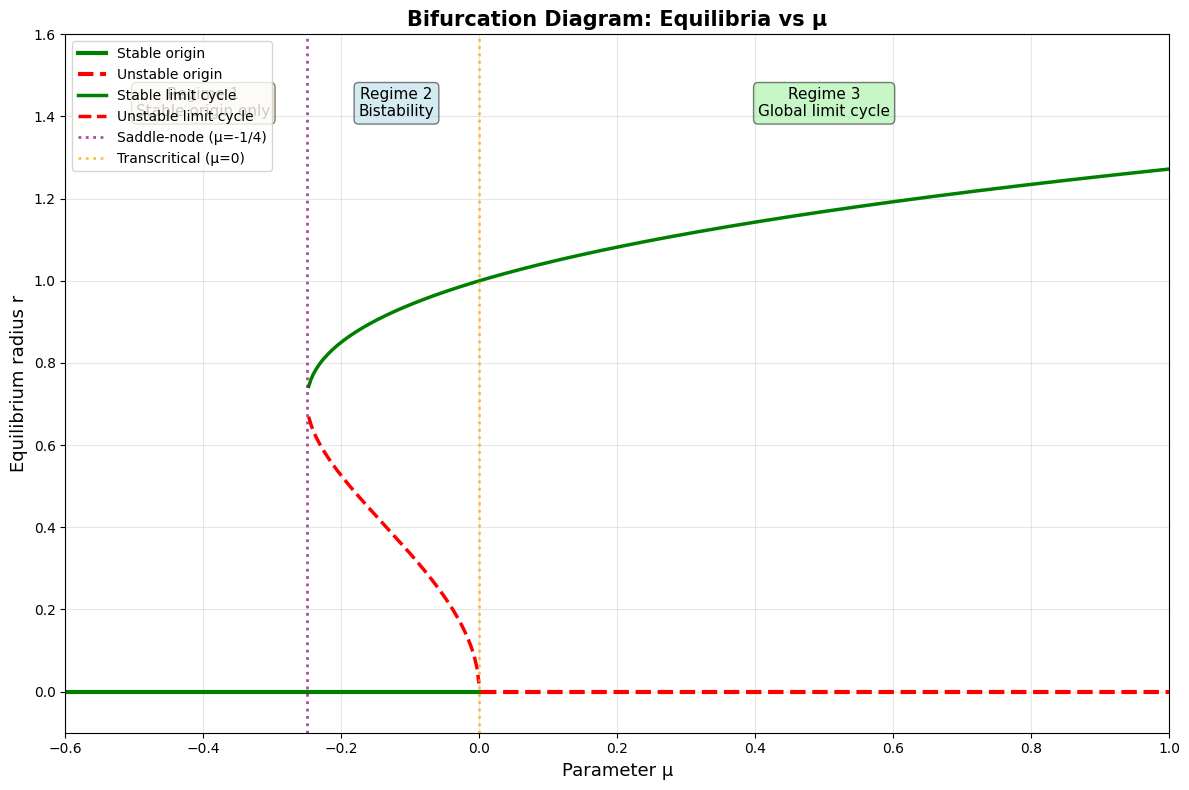

In [20]:
# Create bifurcation diagram
fig, ax = radial.plot_bifurcation_diagram(mu_min=-0.6, mu_max=1.0, figsize=(12, 8))
plt.show()

#### Summary: The Global Picture

**Three Key Regimes:**

| Parameter Range | Equilibria | Behavior | Interpretation |
|----------------|------------|----------|----------------|
| $\mu < -\frac{1}{4}$ | Origin only (stable) | All trajectories → origin | System always decays to rest |
| $-\frac{1}{4} < \mu < 0$ | Origin (stable) + 2 circles | **Bistability**: fate depends on $r_0$ | Competition between rest and oscillation |
| $\mu > 0$ | Origin (unstable) + 1 circle (stable) | All trajectories → limit cycle | System always oscillates |

**The Role of Separatrices:**

In Regime 2, the unstable inner limit cycle is a **separatrix** - a boundary in phase space that separates regions with qualitatively different long-term behavior:
- **Inside the separatrix**: Trajectories attracted to the stable origin (decay to rest)
- **Outside the separatrix**: Trajectories attracted to the stable outer circle (sustained oscillation)

This is an example of **bistability** - two coexisting stable states where initial conditions determine the final outcome.

**Bifurcation Transitions:**

1. At $\mu = -\frac{1}{4}$: A **saddle-node bifurcation** creates two nonzero equilibria (one stable, one unstable) from nothing

2. At $\mu = 0$: A **supercritical Hopf bifurcation** where:
   - The origin loses stability
   - The inner unstable circle collides with the origin and disappears
   - Only the stable outer circle remains, becoming the global attractor

**Physical Significance:**

This system models many real-world phenomena where:
- A parameter controls whether the system reaches equilibrium or oscillates
- There's competition between different stable states
- Small changes in a control parameter can drastically alter system behavior

Examples: population dynamics, chemical oscillators, electronic circuits, climate models.